In [1]:
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
print(tf.keras.__version__)

2.2.4-tf


In [4]:
mnist_fashion = tf.keras.datasets.fashion_mnist

In [5]:
#Loading Fashion dataset
(X_train,Y_train),(X_test,Y_test) = mnist_fashion.load_data()

In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
#X_train is 60,000 images of pixel size 28,28; we would reshape it to 60,000*784
RESHAPED = 784 ##28*28
X_train = X_train.reshape(60000,RESHAPED)
X_test = X_test.reshape(10000,RESHAPED)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [9]:
#Normalizing the input to be within the range of (0.1) so diving each element by 255
X_train /=255
X_test /=255
print(X_train.shape[0])
print(X_test.shape[0])

60000
10000


In [10]:
##One Hot Encoding of the labels
Y_train = tf.keras.utils.to_categorical(Y_train,10)
Y_test = tf.keras.utils.to_categorical(Y_test,10)

In [11]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
model_0 = Sequential()
#Now model will take input arrays of shape (*,784) # and output arrays of shape (*,10)
model_0.add(Dense(10,input_shape=(784,),name='dense_layer',activation='softmax'))

In [12]:
#Compiling the model
model_0.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
#Training the model
training = model_0.fit(X_train,Y_train,batch_size=64,epochs=70,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/70
48000/48000 [==============================] - 1s 30us/sample - loss: 1.0261 - accuracy: 0.6838 - val_loss: 0.7577 - val_accuracy: 0.7567
Epoch 2/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.7034 - accuracy: 0.7767 - val_loss: 0.6561 - val_accuracy: 0.7890
Epoch 3/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.6317 - accuracy: 0.7981 - val_loss: 0.6093 - val_accuracy: 0.7992
Epoch 4/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5930 - accuracy: 0.8094 - val_loss: 0.5798 - val_accuracy: 0.8085
Epoch 5/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5677 - accuracy: 0.8151 - val_loss: 0.5591 - val_accuracy: 0.8135
Epoch 6/70
48000/48000 [==============================] - 1s 21us/sample - loss: 0.5490 - accuracy: 0.8216 - val_loss: 0.5445 - val_accuracy: 0.8188
Epoch 7/70
48000/48000 [==============================] 

48000/48000 [==============================] - 1s 20us/sample - loss: 0.4184 - accuracy: 0.8576 - val_loss: 0.4361 - val_accuracy: 0.8495
Epoch 56/70
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4179 - accuracy: 0.8581 - val_loss: 0.4347 - val_accuracy: 0.8512
Epoch 57/70
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4175 - accuracy: 0.8579 - val_loss: 0.4339 - val_accuracy: 0.8522
Epoch 58/70
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4166 - accuracy: 0.8578 - val_loss: 0.4342 - val_accuracy: 0.8516
Epoch 59/70
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4161 - accuracy: 0.8584 - val_loss: 0.4348 - val_accuracy: 0.8516
Epoch 60/70
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4157 - accuracy: 0.8586 - val_loss: 0.4343 - val_accuracy: 0.8495
Epoch 61/70
48000/48000 [==============================] - 1s 20us/sample - loss: 0.4150 - accuracy: 0.8590 - va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


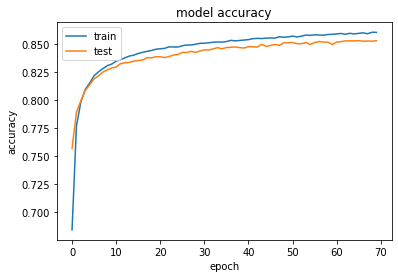

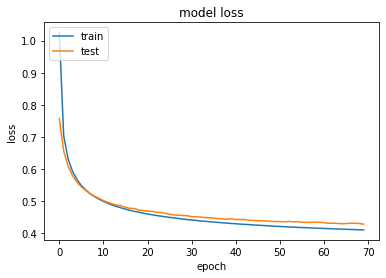

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
#Summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#Summarize the training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [15]:
test_loss,test_acc = model_0.evaluate(X_test,Y_test)
print('Test Accuracy',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy 0.8411


In [16]:
model_0.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x633b6a210>>

In [17]:
model_0.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 10,
    'activation': 'softmax',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}}]}

In [18]:
from tensorflow.keras.layers import Dropout
#Most common type of model is a stac k of layer
model_1 = tf.keras.Sequential()
N_hidden = 64
#Adds a densely connected layer with 64 units to the model
model_1.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
#Adding another dense layer
model_1.add(Dense(N_hidden,name='dense_layer_1',activation='relu'))
#Add an output layer with 10 output units
model_1.add(Dense(10,name='dense_layer_2',activation='softmax'))

In [19]:
model_1.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
#Training the model
training = model_1.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 34us/sample - loss: 1.0189 - accuracy: 0.6749 - val_loss: 0.6771 - val_accuracy: 0.7680
Epoch 2/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.6147 - accuracy: 0.7915 - val_loss: 0.5590 - val_accuracy: 0.8096
Epoch 3/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.5314 - accuracy: 0.8166 - val_loss: 0.5050 - val_accuracy: 0.8248
Epoch 4/100
48000/48000 [==============================] - 1s 28us/sample - loss: 0.4914 - accuracy: 0.8289 - val_loss: 0.4942 - val_accuracy: 0.8253
Epoch 5/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.4676 - accuracy: 0.8366 - val_loss: 0.4760 - val_accuracy: 0.8309
Epoch 6/100
48000/48000 [==============================] - 1s 29us/sample - loss: 0.4512 - accuracy: 0.8421 - val_loss: 0.4499 - val_accuracy: 0.8425
Epoch 7/100
48000/48000 [=========================

Epoch 55/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2698 - accuracy: 0.9028 - val_loss: 0.3413 - val_accuracy: 0.8779
Epoch 56/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2673 - accuracy: 0.9040 - val_loss: 0.3365 - val_accuracy: 0.8813
Epoch 57/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2656 - accuracy: 0.9036 - val_loss: 0.3511 - val_accuracy: 0.8782
Epoch 58/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2640 - accuracy: 0.9054 - val_loss: 0.3404 - val_accuracy: 0.8800
Epoch 59/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2625 - accuracy: 0.9051 - val_loss: 0.3351 - val_accuracy: 0.8813
Epoch 60/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2608 - accuracy: 0.9061 - val_loss: 0.3466 - val_accuracy: 0.8781
Epoch 61/100
48000/48000 [==============================] - 1s 27us/sample - loss: 0.2593 - ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


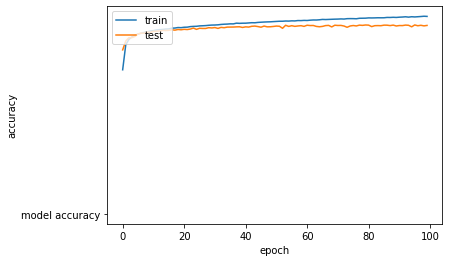

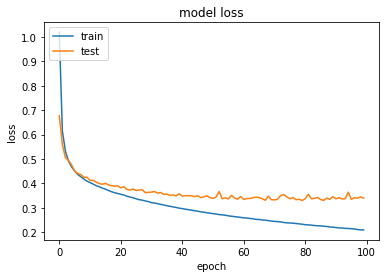

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all data in training
print(training.history.keys())
#Summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.plot('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
#Summarize training for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [22]:
#Evaluate the model
test_loss,test_acc = model_1.evaluate(X_test,Y_test)
print('test Accuracy',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test Accuracy 0.8753


In [23]:
model_1.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x64088d7d0>>

In [24]:
model_1.weights

[<tf.Variable 'dense_layer_1/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.05016656,  0.03328911, -0.05872578, ...,  0.08073894,
         -0.07698937, -0.04619404],
        [ 0.00122235,  0.05021874, -0.06206717, ...,  0.02287085,
          0.01615965,  0.01357353],
        [ 0.06766696, -0.05688261,  0.07756016, ...,  0.07180236,
          0.03247883, -0.03322408],
        ...,
        [ 0.03747087, -0.00412358,  0.05811816, ...,  0.00561946,
         -0.05718023, -0.06054343],
        [ 0.03570172,  0.06279633,  0.0789979 , ...,  0.01061563,
         -0.04189834, -0.02123857],
        [-0.08352304,  0.01709269, -0.03338188, ..., -0.03689728,
          0.0554966 ,  0.03787523]], dtype=float32)>,
 <tf.Variable 'dense_layer_1/bias:0' shape=(64,) dtype=float32, numpy=
 array([ 0.09538896,  0.11464079, -0.03350564,  0.00293239,  0.00692757,
         0.15331277, -0.01625439,  0.00667206,  0.19783647, -0.11877979,
        -0.09272034,  0.08994553, -0.06505056,  0.09494814,  0.

In [25]:
model_1.get_config()

{'name': 'sequential_1',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 64,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_con

In [26]:
#Adding dropout to avoid overfitting

In [27]:
from tensorflow.keras.layers import Dropout
#Most common type of layer is a stack of layers
model_2 = tf.keras.Sequential()
N_hidden = 128
#Add a Densely connected layer with 128 units
model_2.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
model_2.add(Dropout(0.3))
#Add another Dense and Dropout layer
model_2.add(Dense(N_hidden,name='dense_layer_1',input_shape=(784,),activation='relu'))
model_2.add(Dropout(0.3))
#Add an output layer with 10 units for 10 different classes
model_2.add(Dense(10,name='dense_layer_2',activation='softmax'))

In [28]:
#Compile the model
model_2.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

In [29]:
#Training the model
training = model_2.fit(X_train,Y_train,epochs=100,batch_size=64,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 2s 42us/sample - loss: 1.2030 - accuracy: 0.5823 - val_loss: 0.7220 - val_accuracy: 0.7453
Epoch 2/100
48000/48000 [==============================] - 2s 35us/sample - loss: 0.7889 - accuracy: 0.7210 - val_loss: 0.6026 - val_accuracy: 0.7899
Epoch 3/100
48000/48000 [==============================] - 2s 35us/sample - loss: 0.6847 - accuracy: 0.7615 - val_loss: 0.5529 - val_accuracy: 0.8054
Epoch 4/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.6260 - accuracy: 0.7822 - val_loss: 0.5127 - val_accuracy: 0.8177
Epoch 5/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.5826 - accuracy: 0.7988 - val_loss: 0.4879 - val_accuracy: 0.8270
Epoch 6/100
48000/48000 [==============================] - 2s 35us/sample - loss: 0.5561 - accuracy: 0.8079 - val_loss: 0.4699 - val_accuracy: 0.8313
Epoch 7/100
48000/48000 [=========================

Epoch 55/100
48000/48000 [==============================] - 2s 33us/sample - loss: 0.3232 - accuracy: 0.8837 - val_loss: 0.3264 - val_accuracy: 0.8813
Epoch 56/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3248 - accuracy: 0.8852 - val_loss: 0.3251 - val_accuracy: 0.8860
Epoch 57/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3228 - accuracy: 0.8852 - val_loss: 0.3270 - val_accuracy: 0.8836
Epoch 58/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3176 - accuracy: 0.8861 - val_loss: 0.3212 - val_accuracy: 0.8860
Epoch 59/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3183 - accuracy: 0.8865 - val_loss: 0.3223 - val_accuracy: 0.8854
Epoch 60/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3170 - accuracy: 0.8863 - val_loss: 0.3234 - val_accuracy: 0.8857
Epoch 61/100
48000/48000 [==============================] - 2s 34us/sample - loss: 0.3152 - ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


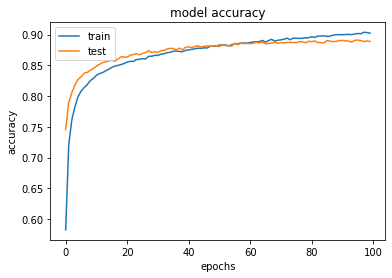

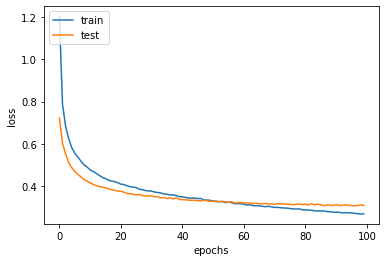

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
#Summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [31]:
test_loss,test_acc = model_2.evaluate(X_test,Y_test)
print('Test Accuracy',test_acc)
print('Test Loss',test_loss)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy 0.8855
Test Loss 0.32795131866931915


In [32]:
#Model 3
model_3 = tf.keras.Sequential()
N_hidden=64
model_3.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
model_3.add(Dropout(0.3))
#Adding one more layer
model_3.add(Dense(N_hidden,name='dense_layer_1',activation='relu'))
model_3.add(Dropout(0.3))
#Adding the output layer with 10 units for 10 different classes
model_3.add(Dense(10,name='dense_layer_3',activation='softmax'))

In [33]:
#Compile the model
model_3.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
#Training the model
training = model_3.fit(X_train,Y_train,batch_size=128,epochs=30,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 1s 26us/sample - loss: 0.8576 - accuracy: 0.6931 - val_loss: 0.4955 - val_accuracy: 0.8253
Epoch 2/30
48000/48000 [==============================] - 1s 18us/sample - loss: 0.5489 - accuracy: 0.8080 - val_loss: 0.4253 - val_accuracy: 0.8464
Epoch 3/30
48000/48000 [==============================] - 1s 18us/sample - loss: 0.4954 - accuracy: 0.8243 - val_loss: 0.4060 - val_accuracy: 0.8530
Epoch 4/30
48000/48000 [==============================] - 1s 19us/sample - loss: 0.4603 - accuracy: 0.8365 - val_loss: 0.3956 - val_accuracy: 0.8568
Epoch 5/30
48000/48000 [==============================] - 1s 18us/sample - loss: 0.4398 - accuracy: 0.8433 - val_loss: 0.3860 - val_accuracy: 0.8651
Epoch 6/30
48000/48000 [==============================] - 1s 18us/sample - loss: 0.4209 - accuracy: 0.8497 - val_loss: 0.3757 - val_accuracy: 0.8637
Epoch 7/30
48000/48000 [==============================] 

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


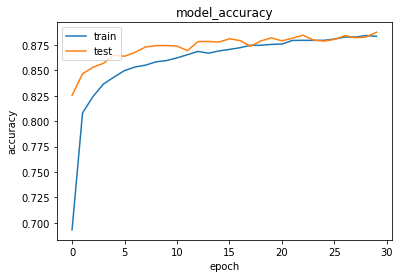

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
#list all training data
print(training.history.keys())
#Summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [36]:
test_loss,test_acc = model_3.evaluate(X_test,Y_test)
print('Test Accuracy:',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 0.8744


In [37]:
#Most common model type is a stack of layers
model_4 = tf.keras.Sequential()
N_hidden=512
model_4.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
model_4.add(Dropout(0.3))
#Adding another layer
model_4.add(Dense(N_hidden,name='dense_layer_1',activation='relu'))
model_4.add(Dropout(0.2))
#Adding the output layer
model_4.add(Dense(10,name='dense_layer_2',activation='softmax'))

In [38]:
model_4.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
training = model_4.fit(X_train,Y_train,batch_size=128,epochs=30,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 3s 68us/sample - loss: 0.5557 - accuracy: 0.8031 - val_loss: 0.3939 - val_accuracy: 0.8542
Epoch 2/30
48000/48000 [==============================] - 3s 58us/sample - loss: 0.4055 - accuracy: 0.8539 - val_loss: 0.3728 - val_accuracy: 0.8589
Epoch 3/30
48000/48000 [==============================] - 3s 55us/sample - loss: 0.3727 - accuracy: 0.8627 - val_loss: 0.3653 - val_accuracy: 0.8635
Epoch 4/30
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3515 - accuracy: 0.8694 - val_loss: 0.3504 - val_accuracy: 0.8730
Epoch 5/30
48000/48000 [==============================] - 3s 58us/sample - loss: 0.3329 - accuracy: 0.8762 - val_loss: 0.3274 - val_accuracy: 0.8810
Epoch 6/30
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3192 - accuracy: 0.8819 - val_loss: 0.3341 - val_accuracy: 0.8771
Epoch 7/30
48000/48000 [==============================] 

In [40]:
test_loss,test_acc = model_4.evaluate(X_test,Y_test)
print('Test Accuracy',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy 0.8889


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


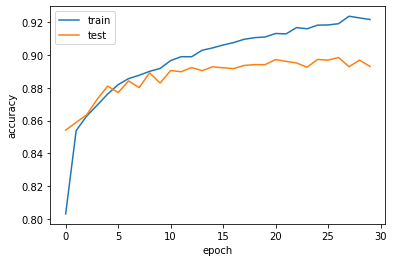

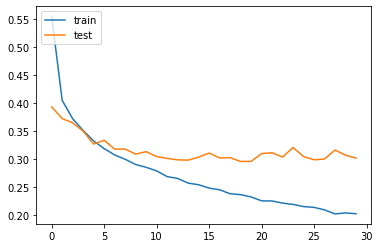

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['train','test'],loc='upper left')
plt.show()

In [42]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [43]:
model_4.weights

[<tf.Variable 'dense_layer_5/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.13789654,  0.0536604 ,  0.02669805, ...,  0.01178763,
          0.07875735,  0.05525136],
        [-0.08756667,  0.01513624,  0.02015505, ..., -0.05413081,
          0.13510062,  0.12044751],
        [-0.23338082,  0.06430318, -0.06844169, ..., -0.00997334,
          0.24674377, -0.00326638],
        ...,
        [ 0.15891548, -0.02821954,  0.00506518, ...,  0.04021943,
          0.24020334,  0.00453022],
        [ 0.28302982, -0.06262474, -0.08628674, ...,  0.03010884,
          0.13799566, -0.06973699],
        [-0.10269164,  0.07334431,  0.02488029, ..., -0.04189736,
         -0.12182824, -0.06522425]], dtype=float32)>,
 <tf.Variable 'dense_layer_5/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 0.01179178,  0.09930163,  0.02414815,  0.1605778 , -0.01343907,
         0.20318118,  0.08924752,  0.04052105,  0.18296832, -0.37253943,
        -0.06237369,  0.0327129 , -0.00883402,  0.18986708,  

In [44]:
model_4.get_config()

{'name': 'sequential_4',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_4',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},


In [51]:
model_5 = tf.keras.Sequential()
N_hidden = 512
#Adding the first layer
model_5.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
model_5.add(Dropout(0.3))
#Adding another layer
model_5.add(Dense(N_hidden,name='dense_layer_1',activation='relu'))
model_5.add(Dropout(0.3))
#Adding the output layer
model_5.add(Dense(10,name='dense_layer_2',activation='softmax'))

In [52]:
model_5.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [53]:
training = model_5.fit(X_train,Y_train,batch_size=64,epochs=30,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 4s 88us/sample - loss: 0.5513 - accuracy: 0.8007 - val_loss: 0.4208 - val_accuracy: 0.8423
Epoch 2/30
48000/48000 [==============================] - 4s 78us/sample - loss: 0.4198 - accuracy: 0.8461 - val_loss: 0.3609 - val_accuracy: 0.8664
Epoch 3/30
48000/48000 [==============================] - 4s 76us/sample - loss: 0.3819 - accuracy: 0.8600 - val_loss: 0.3700 - val_accuracy: 0.8647
Epoch 4/30
48000/48000 [==============================] - 4s 80us/sample - loss: 0.3603 - accuracy: 0.8671 - val_loss: 0.3601 - val_accuracy: 0.8726
Epoch 5/30
48000/48000 [==============================] - 4s 79us/sample - loss: 0.3456 - accuracy: 0.8738 - val_loss: 0.3370 - val_accuracy: 0.8773
Epoch 6/30
48000/48000 [==============================] - 4s 78us/sample - loss: 0.3348 - accuracy: 0.8758 - val_loss: 0.3389 - val_accuracy: 0.8776
Epoch 7/30
48000/48000 [==============================] 

In [54]:
test_loss,test_acc = model_5.evaluate(X_test,Y_test)
print('Test Accuracy',test_acc)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy 0.8868


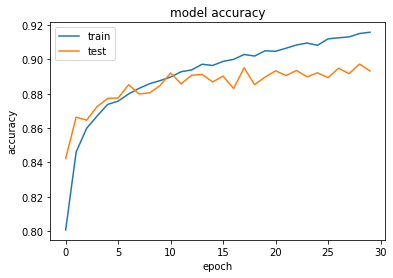

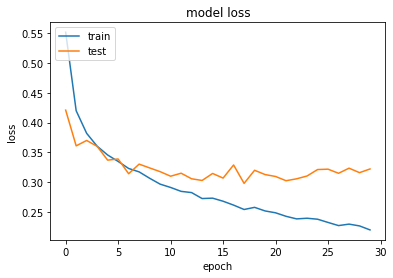

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [56]:
model_5.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 512)               401920    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_1 (Dense)        (None, 512)               262656    
_________________________________________________________________
dropout_9 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [57]:
model_5.get_config()

{'name': 'sequential_6',
 'layers': [{'class_name': 'Dense',
   'config': {'name': 'dense_layer',
    'trainable': True,
    'batch_input_shape': (None, 784),
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None}},
  {'class_name': 'Dropout',
   'config': {'name': 'dropout_8',
    'trainable': True,
    'dtype': 'float32',
    'rate': 0.3,
    'noise_shape': None,
    'seed': None}},
  {'class_name': 'Dense',
   'config': {'name': 'dense_layer_1',
    'trainable': True,
    'dtype': 'float32',
    'units': 512,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},


In [58]:
model_5.weights

[<tf.Variable 'dense_layer_7/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[-0.01779659,  0.07406855, -0.02576806, ...,  0.06737946,
          0.14309989,  0.25458816],
        [-0.03235042,  0.0261593 ,  0.05943431, ...,  0.04907816,
          0.37692115,  0.20009987],
        [-0.05110799, -0.0233281 , -0.0941569 , ...,  0.01613592,
          0.31481948,  0.40915775],
        ...,
        [-0.07563543,  0.1563598 , -0.00745935, ...,  0.00412264,
          0.32673228,  0.26440135],
        [-0.16658355,  0.14763285,  0.04771189, ...,  0.02686723,
          0.24521479,  0.33718634],
        [-0.06049591,  0.12039468,  0.05647095, ..., -0.03362931,
          0.2876033 ,  0.375629  ]], dtype=float32)>,
 <tf.Variable 'dense_layer_7/bias:0' shape=(512,) dtype=float32, numpy=
 array([ 4.18143809e-01,  1.68104887e-01,  6.87415525e-02, -1.75292324e-02,
        -7.15092709e-03,  2.34495737e-02,  1.93163902e-01, -5.40122688e-02,
         1.06292717e-01,  2.50884006e-03, -3.59795809e-

In [61]:
#Model 6 : Adding one more layer
model_6 = tf.keras.Sequential()
N_hideen=512
model_6.add(Dense(N_hidden,name='dense_layer',input_shape=(784,),activation='relu'))
model_6.add(Dropout(0.3))
#Add one more layer
model_6.add(Dense(N_hidden,name='dense_layer_1',activation='relu'))
model_6.add(Dropout(0.3))
#Adding another dense layer
model_6.add(Dense(N_hidden,name='dense_layer_2',activation='relu'))
model_6.add(Dropout(0.3))
#Adding another dense layer
model_6.add(Dense(N_hidden,name='dense_layer_3',activation='relu'))
model_6.add(Dropout(0.3))
#Adding the output layer
model_6.add(Dense(10,name='dense_layer_4',activation='softmax'))

In [62]:
model_6.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [63]:
training = model_6.fit(X_train,Y_train,batch_size=64,epochs=100,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 8s 158us/sample - loss: 0.6182 - accuracy: 0.7755 - val_loss: 0.4504 - val_accuracy: 0.8338
Epoch 2/100
48000/48000 [==============================] - 7s 148us/sample - loss: 0.4563 - accuracy: 0.8359 - val_loss: 0.4234 - val_accuracy: 0.8545
Epoch 3/100
48000/48000 [==============================] - 7s 143us/sample - loss: 0.4244 - accuracy: 0.8469 - val_loss: 0.3670 - val_accuracy: 0.8655
Epoch 4/100
48000/48000 [==============================] - 7s 141us/sample - loss: 0.3951 - accuracy: 0.8575 - val_loss: 0.3516 - val_accuracy: 0.8705
Epoch 5/100
48000/48000 [==============================] - 7s 148us/sample - loss: 0.3831 - accuracy: 0.8634 - val_loss: 0.3727 - val_accuracy: 0.8698
Epoch 6/100
48000/48000 [==============================] - 8s 156us/sample - loss: 0.3691 - accuracy: 0.8658 - val_loss: 0.3396 - val_accuracy: 0.8744
Epoch 7/100
48000/48000 [===================

48000/48000 [==============================] - 8s 161us/sample - loss: 0.2427 - accuracy: 0.9127 - val_loss: 0.3304 - val_accuracy: 0.8940
Epoch 55/100
48000/48000 [==============================] - 8s 162us/sample - loss: 0.2519 - accuracy: 0.9095 - val_loss: 0.3196 - val_accuracy: 0.8932
Epoch 56/100
48000/48000 [==============================] - 8s 167us/sample - loss: 0.2466 - accuracy: 0.9130 - val_loss: 0.3314 - val_accuracy: 0.8909
Epoch 57/100
48000/48000 [==============================] - 8s 172us/sample - loss: 0.2415 - accuracy: 0.9139 - val_loss: 0.3332 - val_accuracy: 0.8914
Epoch 58/100
48000/48000 [==============================] - 8s 165us/sample - loss: 0.2393 - accuracy: 0.9151 - val_loss: 0.3453 - val_accuracy: 0.8875
Epoch 59/100
48000/48000 [==============================] - 8s 168us/sample - loss: 0.2449 - accuracy: 0.9130 - val_loss: 0.3296 - val_accuracy: 0.8959
Epoch 60/100
48000/48000 [==============================] - 8s 172us/sample - loss: 0.2400 - accuracy

In [ ]:
test_loss,test_acc = model_6.evaluate(X_test,Y_test)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [ ]:
model_6.summary()

In [ ]:
model_6.get_config()

In [ ]:
model_6.weights